In [197]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from IPython.display import display
tokenizer = RegexpTokenizer(r'\w+')
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LoRe
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

In [198]:
# nltk.download()

In [199]:
df = pd.read_csv('train.csv')

In [200]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [201]:
df.text = df.text.apply(lambda x: ' '.join(tokenizer.tokenize(x.lower())))

In [202]:
df['length']=df.text.apply(lambda x:len(x.split(' ')))
df['unique_l']=df.text.apply(lambda x:len(set(x.split(' '))))
df['diversity'] = df.unique_l/df.length

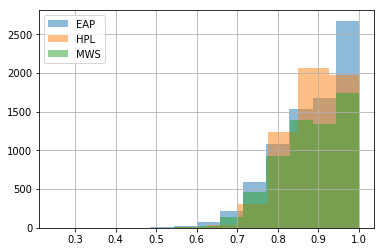

In [203]:
f,ax=plt.subplots()
for auth in df.author.unique():
    df.diversity[df.author==auth].hist(alpha=0.5,label=auth,ax=ax)
    ax.legend()

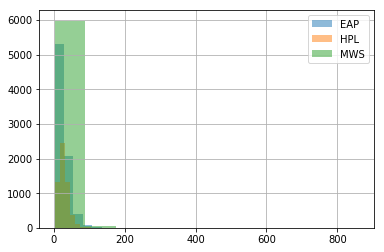

In [204]:
f,ax=plt.subplots()
for auth in df.author.unique():
    df.length[df.author==auth].hist(alpha=0.5,label=auth,ax=ax)
    ax.legend()

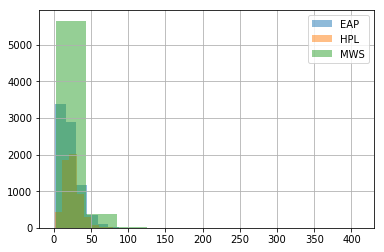

In [205]:
f,ax=plt.subplots()
for auth in df.author.unique():
    df.unique_l[df.author==auth].hist(alpha=0.5,label=auth,ax=ax)
    ax.legend()

In [206]:
def bagging(text):
    dictio={}
    for word in text.split(' '):
        if word in dictio.keys():
            dictio[word]+=1
        else:
            dictio[word]=1
    return dictio

In [207]:
df['bagged']=df.text.apply(bagging)

In [ ]:
per_auth={}
for auth in df.author.unique():
    df_temp=df[df.author==auth]
    result={}
    for i in range(len(df_temp.bagged)):
        x=df_temp.bagged.iloc[i]
        result={ k: x.get(k, 0) + result.get(k, 0) for k in set(x) | set(result) }
    per_auth[auth]=result
        

In [ ]:
# for word in set(per_auth['EAP'])|set(per_auth['MWS'])|set(per_auth['HPL']):
#     for auth in df.author.unique():
#         try:
#             print '{}: {} has count: {}'.format(auth,word,per_auth[auth][word])
#         except KeyError:
#             print '{}: {} has count: {}'.format(auth,word,0)

In [ ]:
for word in set(per_auth['EAP'])|set(per_auth['MWS'])|set(per_auth['HPL']):
    for auth in df.author.unique():
        if word in per_auth[auth]:
            pass
        else:
            per_auth[auth][word]=0

In [ ]:
scores = {}
for word in per_auth['EAP'].keys():
    author = ''
    maxi = 0
    suma=0
    for auth in df.author.unique():
        suma+=per_auth[auth][word]
        if per_auth[auth][word]>maxi: # colisions on draws!
            author=auth
            maxi=per_auth[auth][word]
    scores[word]=(author,maxi/suma,maxi)

In [16]:
### scores is my trained model... basic basic model

In [17]:
for i in range(10):
    N = np.random.randint(len(df))
    text = df.text.iloc[N]
    target = df.author.iloc[N] 
    print target,': ',text
    score = {'HPL':0,'EAP':0,'MWS':0}
    for word in text.split(' '):
        if word not in scores.keys():
            pass
        else:
            Key,Sc,L=scores[word]
            score[Key]+=Sc
    tot=0
    for k in score.keys():
        tot+=score[k]
    for k in score.keys():
        score[k]=score[k]/tot
#     print score

EAP :  hab for to keep mighty tight eye pon him noovers
HPL :  then came the storm of april nd and a gathering of the clouds about his consciousness
EAP :  the apartments were so irregularly disposed that the vision embraced but little more than one at a time
EAP :  well then you shall be married precisely precisely now mind when three sundays come together in a week do you hear me sir what are you gaping at
EAP :  my dear miss zenobia he said while the tears stood in his eyes is there anything else i can do to promote the success of your laudable undertaking
HPL :  lavinia sobbed but wilbur only chuckled whilst the hill noises rumbled faintly
HPL :  we kept track of all the deaths and their circumstances with systematic care
EAP :  you should have seen me you should
MWS :  the intense life that quickened my pulses and animated my frame had the effect not of drawing me into the mazes of active life but of exalting my lowliness and of bestowing majestic proportions on insignificant obje

In [27]:
predictions=[]
for X in df.iterrows():
    prediction={}
    txt=X[1].text
    ID=X[1].id
    score = {'HPL':0,'EAP':0,'MWS':0}
    for word in txt.split(' '):
        if word not in scores.keys():
            pass
        else:
            Key,Sc,L=scores[word]
            score[Key]+=Sc
    tot=0
    for k in score.keys():
        tot+=score[k]
    for k in score.keys():
        prediction[k]=score[k]/tot
    prediction['id']=ID
    predictions.append(prediction)

In [28]:
subs=pd.DataFrame(predictions)

In [29]:
subs = subs[['id','EAP','HPL','MWS']] 
subs.columns=['id','EAP_feat','HPL_feat','MWS_feat']
subs.head()

,id,EAP_feat,HPL_feat,MWS_feat
0,id26305,0.679746,0.130062,0.190192
1,id17569,0.671952,0.142807,0.185240
2,id11008,0.750559,0.162543,0.086898
3,id27763,0.266252,0.068012,0.665737
4,id12958,0.526645,0.264436,0.208919


In [31]:
new_df = pd.merge(df,subs,on='id')

In [33]:
new_df.head()

,id,text,author,length,unique_l,diversity,bagged,EAP_feat,HPL_feat,MWS_feat
0,id26305,this process however afforded me no means of a...,EAP,41,35,0.853659,"{u'and': 1, u'afforded': 1, u'seemed': 1, u'se...",0.679746,0.130062,0.190192
1,id17569,it never once occurred to me that the fumbling...,HPL,14,14,1.000000,"{u'me': 1, u'be': 1, u'that': 1, u'never': 1, ...",0.671952,0.142807,0.185240
2,id11008,in his left hand was a gold snuff box from whi...,EAP,36,32,0.888889,"{u'all': 1, u'gold': 1, u'incessantly': 1, u'f...",0.750559,0.162543,0.086898
3,id27763,how lovely is spring as we looked from windsor...,MWS,34,31,0.911765,"{u'and': 2, u'the': 1, u'all': 1, u'fertile': ...",0.266252,0.068012,0.665737
4,id12958,finding nothing else not even gold the superin...,HPL,27,25,0.925926,"{u'superintendent': 1, u'gold': 1, u'look': 1,...",0.526645,0.264436,0.208919


In [185]:
x=np.random.binomial(1,0.8,len(new_df))
lblbin = LabelBinarizer()
lblbin.fit(new_df.author.unique())
trans=lblbin.transform(new_df.author.values)
new_df['EAP_bin']= trans[:,0]
new_df['HPL_bin']= trans[:,1]
new_df['MWS_bin']= trans[:,2]
# data= new_df[['diversity','EAP_feat','HPL_feat','MWS_feat','EAP_bin','HPL_bin','MWS_bin']].values
# train_d=data[x==1][:,:-3]
# test_d=data[x==0][:,-3:]
# train_l=data[x==1][:,:-3]
# test_l=data[x==0][:,-3:]
data= new_df[['diversity','EAP_feat','HPL_feat','MWS_feat','author']].values
train_d=data[x==1][:,:-1]
train_l=data[x==1][:,-1]
test_d=data[x==0][:,:-1]
test_l=data[x==0][:,-1]


In [186]:
lore = LoRe(solver='lbfgs')
lore.fit(train_d,train_l)
pred_p = lore.predict_proba(test_d)
pred = lore.predict(test_d)

In [187]:
log_loss(test_l,pred_p)

0.35650718410727145

In [188]:
# final model
lore = LoRe()
lore.fit(X=new_df[['diversity','EAP_feat','HPL_feat','MWS_feat']].values,y=new_df.author.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
log_loss(new_df.author.values,lore.predict_proba(new_df[['diversity','EAP_feat','HPL_feat','MWS_feat']].values))

0.35839056976236561

In [190]:
smp=pd.read_csv('sample_submission.csv')
display(smp.head())
test=pd.read_csv('test.csv')
test.text = test.text.apply(lambda x: ' '.join(tokenizer.tokenize(x.lower())))
display(test.head())

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698
3,id27757,0.403494,0.287808,0.308698
4,id04081,0.403494,0.287808,0.308698


,id,text
0,id02310,still as i urged our leaving ireland with such...
1,id24541,if a fire wanted fanning it could readily be f...
2,id00134,and when they had broken down the frail door t...
3,id27757,while i was thinking how i should possibly man...
4,id04081,i am not sure to what limit his knowledge may ...


In [112]:
predictions=[]
for X in test.iterrows():
    prediction={}
    txt=X[1].text
    ID=X[1].id
    score = {'HPL':0,'EAP':0,'MWS':0}
    for word in txt.split(' '):
        if word not in scores.keys():
            pass
        else:
            Key,Sc,L=scores[word]
            score[Key]+=Sc
    tot=0
    for k in score.keys():
        tot+=score[k]
    for k in score.keys():
        prediction[k]=score[k]/tot
    prediction['id']=ID
    predictions.append(prediction)

In [191]:
test_feat = pd.DataFrame(predictions)
test_feat = test_feat[['id','EAP','HPL','MWS']] 
test_feat.columns=['id','EAP_feat','HPL_feat','MWS_feat']
test_feat.head()

,id,EAP_feat,HPL_feat,MWS_feat
0,id02310,0.376177,0.000000,0.623823
1,id24541,0.731757,0.124777,0.143466
2,id00134,0.505212,0.312090,0.182697
3,id27757,0.545930,0.251577,0.202493
4,id04081,0.533876,0.000000,0.466124


In [192]:
test['length']=test.text.apply(lambda x:len(x.split(' ')))
test['unique_l']=test.text.apply(lambda x:len(set(x.split(' '))))
test['diversity'] = test.unique_l/df.length

In [193]:
Test=pd.merge(test,test_feat, on='id')
Test.head()

,id,text,length,unique_l,diversity,EAP_feat,HPL_feat,MWS_feat
0,id02310,still as i urged our leaving ireland with such...,19,19,0.463415,0.376177,0.000000,0.623823
1,id24541,if a fire wanted fanning it could readily be f...,62,49,3.500000,0.731757,0.124777,0.143466
2,id00134,and when they had broken down the frail door t...,33,29,0.805556,0.505212,0.312090,0.182697
3,id27757,while i was thinking how i should possibly man...,41,34,1.000000,0.545930,0.251577,0.202493
4,id04081,i am not sure to what limit his knowledge may ...,11,11,0.407407,0.533876,0.000000,0.466124


In [196]:
Test.diversity.max()

41.399999999999999

In [157]:
data= Test[['diversity','EAP_feat','HPL_feat','MWS_feat']].values
pred_prob = lore.predict_proba(data)

In [161]:
submi= pd.DataFrame(pred_prob)
submi['id'] = Test.id
submi

,0,1,2,id
0,0.067578,0.003492,0.928929,id02310
1,0.990577,0.009383,0.000040,id24541
2,0.234804,0.732970,0.032225,id00134
3,0.522269,0.443427,0.034304,id27757
4,0.313157,0.003273,0.683570,id04081
5,0.834405,0.108533,0.057062,id27337
6,0.878470,0.117646,0.003884,id24265
7,0.747731,0.234580,0.017689,id25917
8,0.910606,0.048456,0.040938,id04951
9,0.950522,0.005675,0.043803,id14549


In [163]:
submi.columns=['EAP','HPL','MWS','id']
submi
submi=submi[['id','EAP','HPL','MWS']] 
submi

,id,EAP,HPL,MWS
0,id02310,0.067578,0.003492,0.928929
1,id24541,0.990577,0.009383,0.000040
2,id00134,0.234804,0.732970,0.032225
3,id27757,0.522269,0.443427,0.034304
4,id04081,0.313157,0.003273,0.683570
5,id27337,0.834405,0.108533,0.057062
6,id24265,0.878470,0.117646,0.003884
7,id25917,0.747731,0.234580,0.017689
8,id04951,0.910606,0.048456,0.040938
9,id14549,0.950522,0.005675,0.043803


In [167]:
submi.to_csv('submission_3.csv ',index=False)

In [168]:
submi

,id,EAP,HPL,MWS
0,id02310,0.067578,0.003492,0.928929
1,id24541,0.990577,0.009383,0.000040
2,id00134,0.234804,0.732970,0.032225
3,id27757,0.522269,0.443427,0.034304
4,id04081,0.313157,0.003273,0.683570
5,id27337,0.834405,0.108533,0.057062
6,id24265,0.878470,0.117646,0.003884
7,id25917,0.747731,0.234580,0.017689
8,id04951,0.910606,0.048456,0.040938
9,id14549,0.950522,0.005675,0.043803


In [ ]:
new_df